# mQTLs detected on alternative quantitative traits

Few mQTLs have been detecting using metabolite levels as quantitative trait, even within a "dynamic context" (e.g. using funQTL). In a recent email Nicole and Paul suggested QTL detection using alternative traits computed by Paul: trait variance, AUC, and sum of slopes.

I previously tried with trait variance with few promising QTLs. Paul calculates this variance in a slightly different way as described in his email below.

**From Nicole**:

```
Hi Aaron,

First of all I want to give you a small update on the validation:  We generated four strains (SXY, S-bul2XY, SX Y-bul2, S-bul2 X Y-bul2), characterised them, and will do the dynamic metabolome analysis now.

Paul (in CC) has put some additional thoughts into the analysis of the already generated data and came up with some good ideas, that might be worth following up on.

He calculated the variance, the slope of each time curse and the area under the curve. The data looks like a normal distribution. We wonder, if you could give it a try and map the data.

Best,
Nicole
```


**From Paul**:
```
Hi Aaron,

that should be great. Yep, I do remember for the variance data but, you know...
Just to explain what these data represent. I recently readi the attached paper and what they did can be easily applicable for the GenPhen project. Basically, from the BY/RM cross progeny phenotyped in various conditions, they tried to/mapped loci associated to phenotypic plasticity: calculating variance and sum of slopes for each haploid strain taking all trait values. One of the main drawback is the order of the conditions used for phenotyping.
In the case of the dynamic metabolite profiling that Nicole did, this should not be an issue, considering aligned cultures. 
Thus, what is calculated? from the aligned cultivation data, I took only the time points that were consistent for each quantified metabolite and progeny and calculated 3 parameters
1. variance (that could potentially be a bit different from the one that you calculated previously)
2. the sum of slopes calculated between the different time points
3. and also the area under these curves (AUC) that could also reflect some tendency of increase/decrease of a specific metabolite over time

I still think that you have to exploit this dynamic profiles. Maybe there will have nothing more to highlight than the potential BUL2 gene but I would say it is worth trying it. 

Anyway, enjoy your lab retreat, hope for you that you will go to a sunny place :-)

best regards,

paul
```

**Conclusions:** 

- Few QTLs can be detected with these alternative traits. Similar observation to previous analysis by Aaron for varianceQTLs

- Of the few (two independent) QTLs that are detected, one is on chr13--putative BUL2 QTL that dominates metabolite levels

- Importantly, these traits are highly correlated, which explains why we do not see alternative QTLs


## Run stuff

In [1]:
.libPaths("~/R/x86_64-redhat-linux-gnu-library/3.2/")
# config opts and libraries
options(repr.plot.width = 6, repr.plot.height = 5)
options(jupyter.plot_mimetypes = 'image/png')
# source default libs
devtools::source_url("https://raw.githubusercontent.com/scalefreegan/R-tools/master/defaultRlibs.R")
# additional libraries
library(qtl)
library(funqtl)
library(GGally)

# source rQTL utilities
devtools::source_url("https://raw.githubusercontent.com/scalefreegan/steinmetz-lab/master/QTL/rQTL.R")
# some pairwise cor plot fcns
devtools::source_url("https://raw.githubusercontent.com/scalefreegan/R-tools/master/ggcorplot.R")

RESULTS = "/g/steinmetz/brooks/genphen/metabolome/alt_traits"

SHA-1 hash of file is 22fb06d671e2b067831995cd09e786560ab301f3

Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: BiocGenerics

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union

The following objects are masked from ‘package:stats’:

    IQR, mad, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, as.vector, cbind, coln

In [2]:
strainRename = function(strains) {
    o = sapply(strains,function(strain){
        if (nchar(strain)==3) {
            strain = gsub("^X","0",strain)
        } else if (nchar(strain)==2) {
            strain = paste("0", strain, sep="")
        } else {
            strain = gsub("^X","",strain)
        }
        if (length(grep("\\.",strain))>0) {
            rep = as.numeric(strsplit(strsplit(strain, split = "_")[[1]][2], split = "\\.")[[1]][1]) + 1
            strain = paste(strsplit(strain, split = "_")[[1]][1], rep, sep = "_")
        }
        return(strain)
    })
    return(o)
}

In [3]:
# load data
thisdata = read_tsv(file.path(RESULTS,"alldata.txt")) %>% 
    separate(strain, into = c("strain","rep"), sep = "_") %>% 
    mutate(strain = strainRename(strain), metabolite = toupper(metabolite))
#head(thisdata)

Parsed with column specification:
cols(
  strain = col_character(),
  variance = col_double(),
  sum.of.slopes = col_double(),
  auc = col_double(),
  metabolite = col_character()
)


In [4]:
# load genotype and markers files
genotype_f = "/g/steinmetz/brooks/yeast/genomes/S288CxYJM789/genotypes_S288c_R64.rda"
load(genotype_f)

In [5]:
var.phe = log2(acast(data = thisdata, formula = metabolite ~ strain, 
              value.var="variance", fun.aggregate = mean, na.rm = T))
var.phe[is.infinite(var.phe)] = NA
var.phe[is.na(var.phe)] = NA
var.phe.raw = acast(data = thisdata, formula = metabolite ~ strain, 
              value.var="variance", fun.aggregate = mean, na.rm = T)
    
ss.phe = log2(acast(data = thisdata, formula = metabolite ~ strain, 
              value.var="sum.of.slopes", fun.aggregate = mean, na.rm = T))
ss.phe[is.infinite(ss.phe)] = NA
ss.phe[is.na(ss.phe)] = NA
ss.phe.raw = acast(data = thisdata, formula = metabolite ~ strain, 
              value.var="sum.of.slopes", fun.aggregate = mean, na.rm = T)
    
auc.phe = log2(acast(data = thisdata, formula = metabolite ~ strain, 
              value.var="auc", fun.aggregate = mean, na.rm = T))
auc.phe[is.infinite(auc.phe)] = NA
auc.phe[is.na(auc.phe)] = NA
auc.phe.raw = acast(data = thisdata, formula = metabolite ~ strain, 
              value.var="auc", fun.aggregate = mean, na.rm = T)

I have some drop-out after log2 transform, but this is an important step - QTLs must be mapped with log transformed data!!

In [6]:
# Only run QTL detection if corresponding file does not exist
f1 = file.path(RESULTS, "var_funqtl.rds")
f2 = file.path(RESULTS, "sumsslope_funqtl.rds")
f3 = file.path(RESULTS, "auc_funqtl.rds")
rerun = F

for (i in c(f1, f2, f3)) {
    if (!file.exists(i) | rerun) {
        # QTLs
        if (i == f1) {
            pheno = var.phe
        } else if (i == f2) {
            pheno = ss.phe
        } else {
            pheno = auc.phe
        }
        cross = runQTL(
                    genotype = geno,
                    phenotype = t(pheno),
                    marker_info = mrk,
                    return_cross = TRUE,
                    estimate.map = FALSE
                    )
        these_phe = rownames(pheno)
        pcols = seq(1, length(these_phe))

        qtls = scanone(cross, method = "hk", pheno.col = pcols, use="complete.obs")

        eff = geteffects(cross, pheno.col = pcols)

        # calc permutation threshold
        permout = mclapply(pcols, function(x) {
            try({
                cat(these_phe[x],"\n")
                scanoneF(cross, pheno.cols = x,
                                method = "hk", n.perm = 1000, n.cluster = 12, verbose = F, use="complete.obs")
                })
            })
        names(permout) = these_phe

        # identify chrs with slod/lod above permute val
        qtl_intervals = do.call(rbind, lapply(pcols, function(x){
            thismetabolite = these_phe[x]
            # lod cutoff
            lod = summary(permout[[thismetabolite]])["10%","mlod"]
            # find sig chrs
            sigchrs = as.character(unique(qtls[which(qtls[,thismetabolite] >= lod),"chr"]))
            if (length(sigchrs)>0) {
                intervals = do.call(rbind, lapply(sigchrs, function(y){
                    o = as.data.frame(mrk[rownames(bayesint(qtls,
                      chr = str_pad(as.character(y), 2, pad = "0"), prob=0.9, lodcolumn=x))]) %>%
                        mutate(metabolite = thismetabolite)
                    o = o %>% summarise(seqnames = unique(seqnames), start = min(start),
                                       end = max(end), width = end-start+1, 
                                        metabolite = unique(metabolite))
                    return(o)
                }))
            } else {
                intervals = data.frame()
            }
            return(intervals)
        }))

        o = list(qtls = qtls, eff = eff, qtl_intervals = qtl_intervals,
            permout = permout, pcols = pcols)    

        saveRDS(o , file = i)
    }
    if (i == f1) {
            var.qtls <- readRDS(f1)
        } else if (i == f2) {
            ss.qtls <- readRDS(f2)
        } else {
            auc.qtls <- readRDS(f3)
    }
} 

# RESULTS

## 1. Significant QTL intervals*

#### ** 90% Bayesian confidence interval on sig QTL peaks detected at 10% FDR*

**Conclusions**
- Alternative traits add few additional QTLs
- chr13 QTL (presumably BUL2) is common once again

## QTL interval tables and plots

## Variance QTLs

In [7]:
var.qtls$qtl_intervals %>% arrange(metabolite)

,seqnames,start,end,width,metabolite
1,chr13,38166,91910,53745,HSE
2,chr14,418267,491107,72841,MAL


## Figure 1: Variance QTLs

2 metabolites with variance QTLs

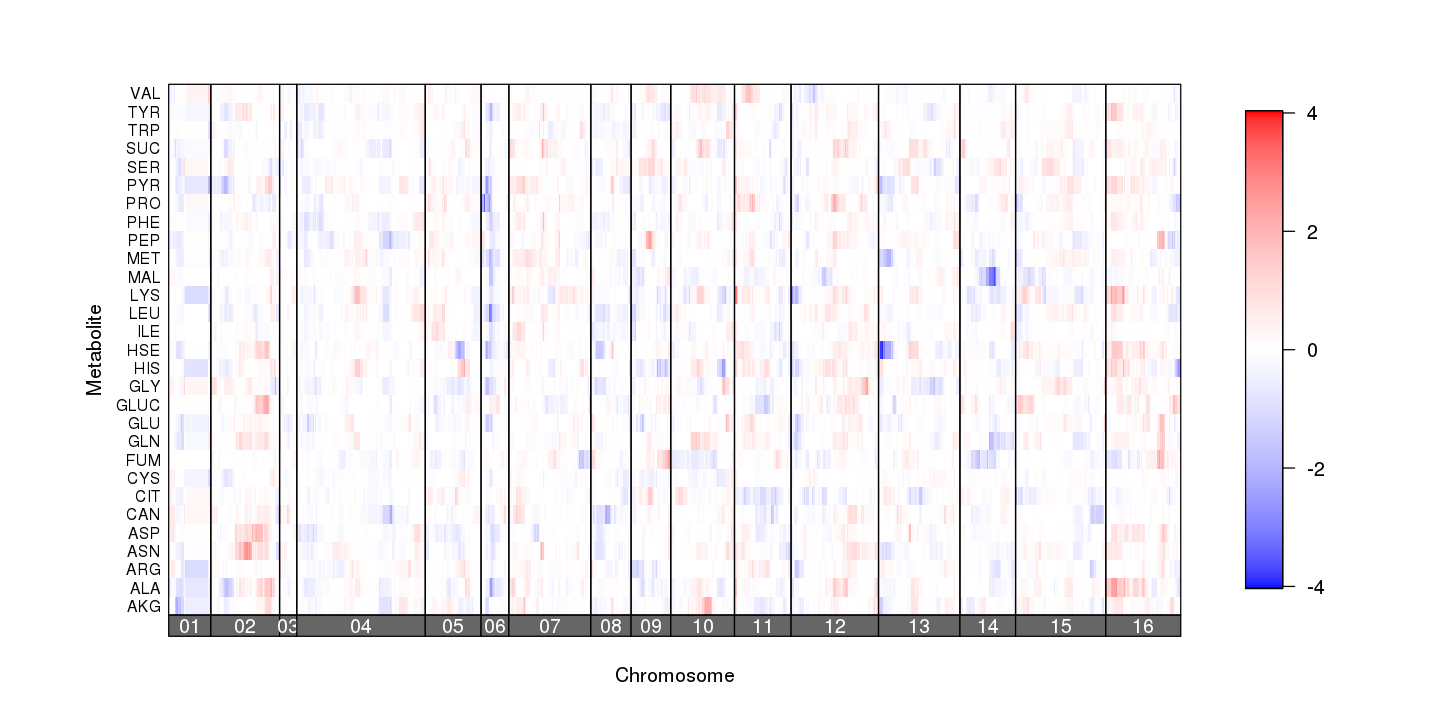

In [8]:
options(repr.plot.width = 12, repr.plot.height = 6)
y.text = colnames(var.qtls$qtls)[3:length(colnames(var.qtls$qtls))]
plotlod_wlabs(var.qtls$qtls, var.qtls$eff, y.text = y.text, ylab = "Metabolite", gap = 15)

## Sum of slopes QTLs

In [9]:
ss.qtls$qtl_intervals %>% arrange(metabolite)

,seqnames,start,end,width,metabolite
1,chr13,34473,91910,57438,HSE


## Figure 2: Sum of slopes QTLs

1 metabolites with variance QTLs

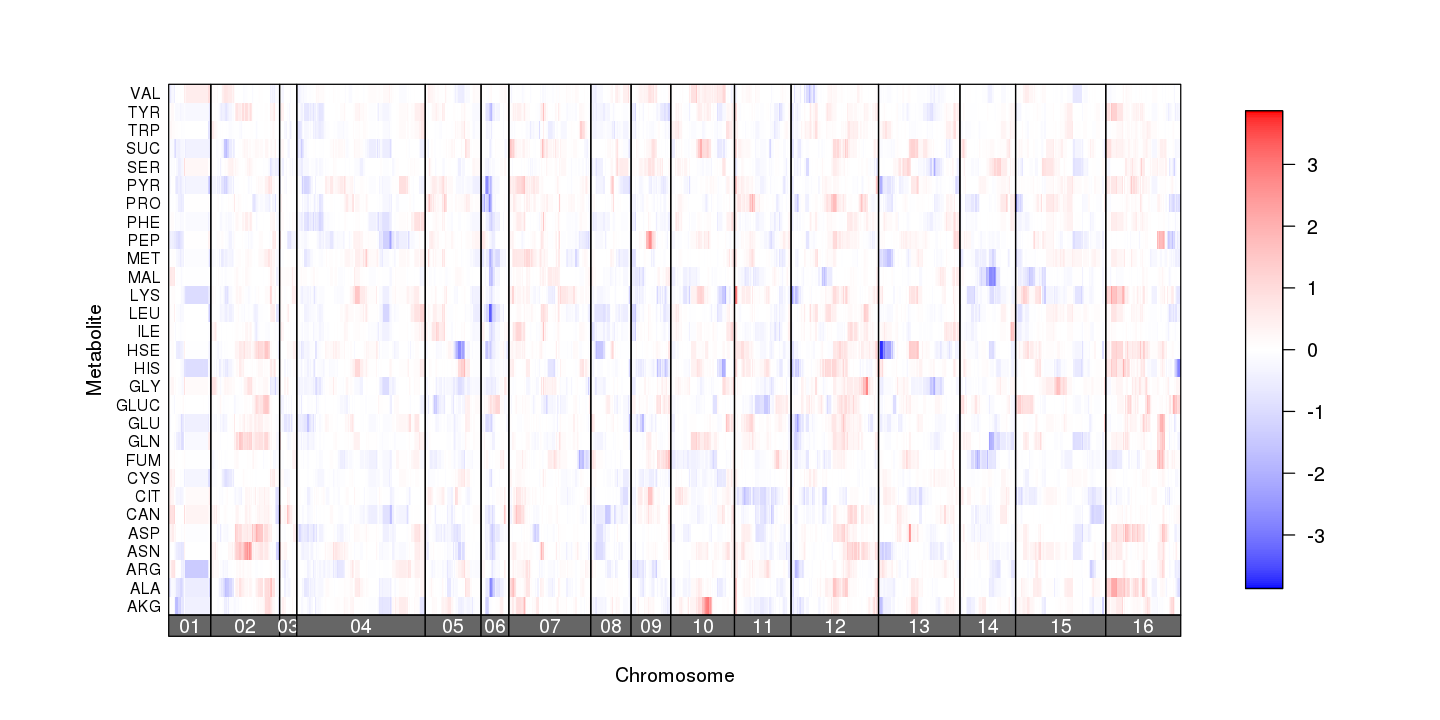

In [10]:
plotlod_wlabs(ss.qtls$qtls, ss.qtls$eff, y.text = y.text, ylab = "Metabolite", gap = 15)

## AUC QTLs

In [11]:
auc.qtls$qtl_intervals %>% arrange(metabolite)

,seqnames,start,end,width,metabolite
1,chr13,24034,67701,43668,HSE


## Figure 3: QUC QTLs

5 metabolites with variance QTLs

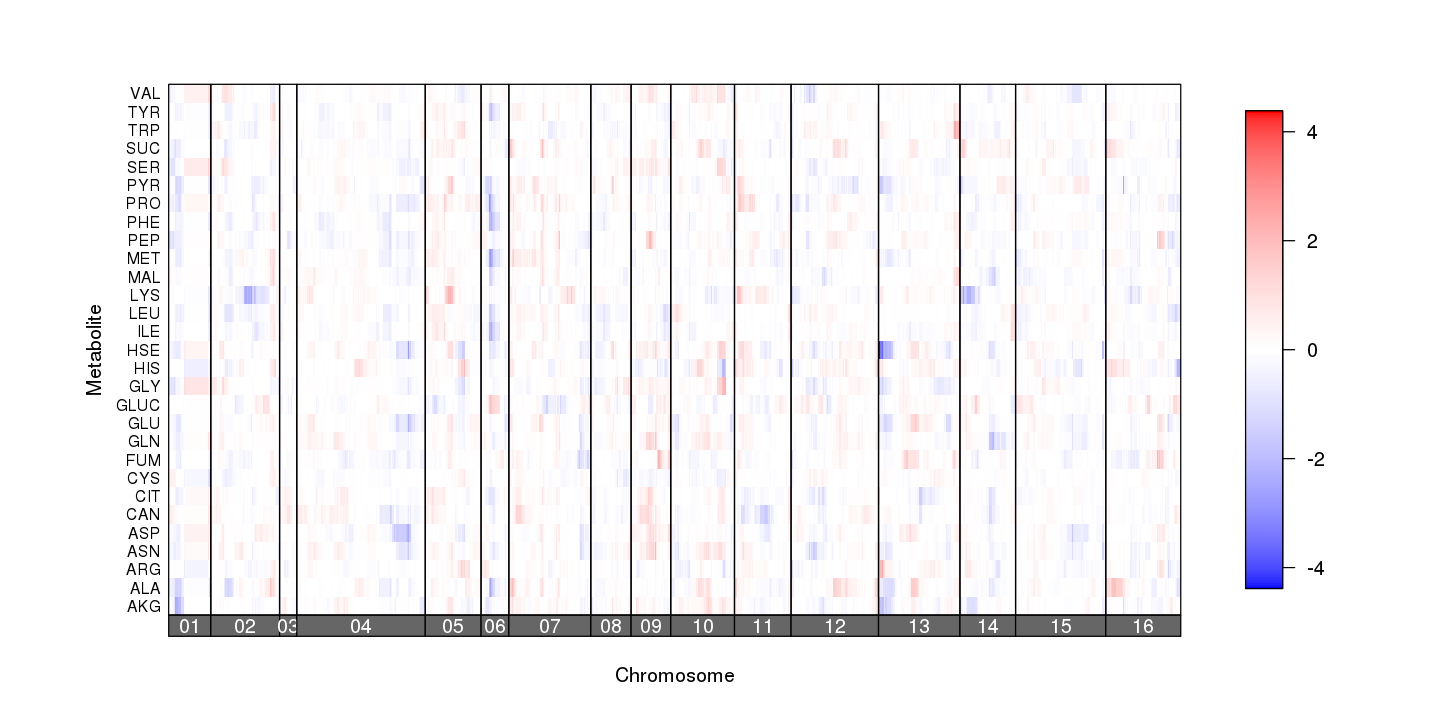

In [12]:
plotlod_wlabs(auc.qtls$qtls, auc.qtls$eff, y.text = y.text, ylab = "Metabolite", gap = 15)

## 2. Distribution of alternative quanitative traits

Quick analysis of the properties of these traits

**Conclusions**

- The traits defined by Paul are *somewhat* normally distributed on log2 scale. Several metabolites clearly aren't, e.g. CYS
- The alternative traits are essentially identical. All of the traits are highly correlated. Would explain similar LOD profiles.

## Figure 4: Variance-trait distribution

Warning message:
: Transformation introduced infinite values in continuous y-axisWarning message:
: Removed 224 rows containing non-finite values (stat_ydensity).

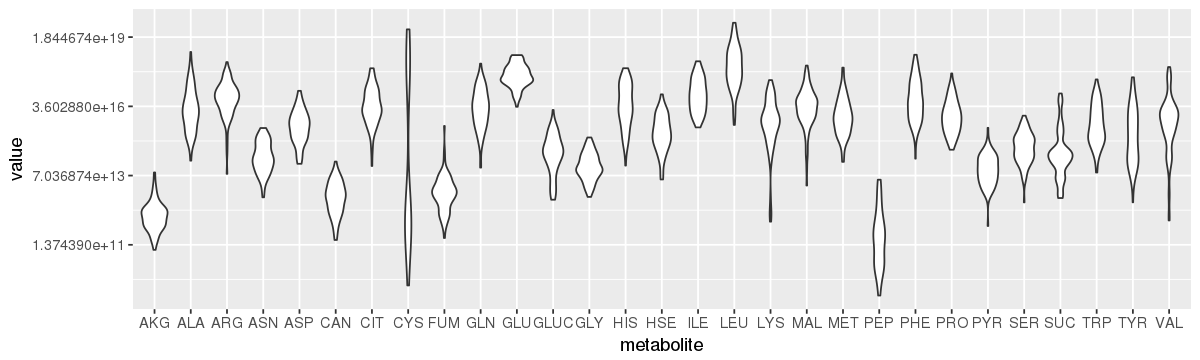

In [13]:
options(repr.plot.width = 10, repr.plot.height = 3)

var.data = melt(var.phe.raw, varnames = c("metabolite", "strain"))
p4 <- ggplot(var.data, aes(metabolite, value)) + geom_violin() + 
    scale_y_continuous(trans="log2")
p4

## Figure 5. Sum-of-slopes-trait distribution

Warning message:
: Transformation introduced infinite values in continuous y-axisWarning message:
: Removed 224 rows containing non-finite values (stat_ydensity).

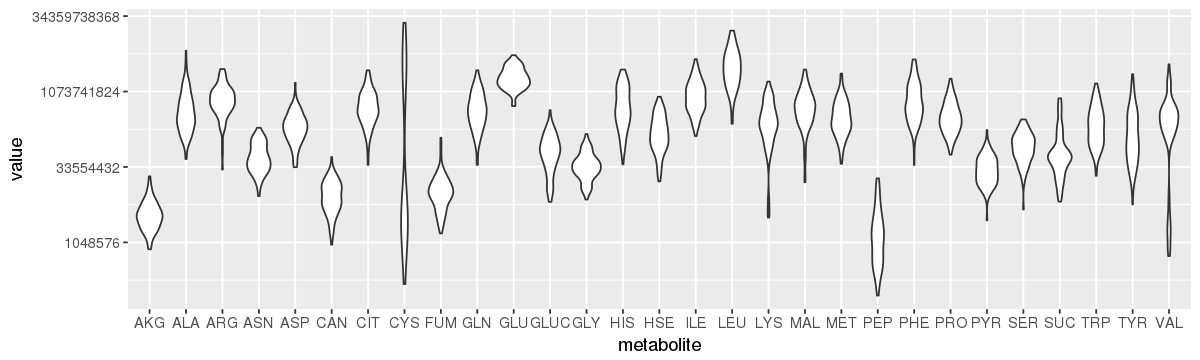

In [14]:
ss.data = melt(ss.phe.raw, varnames = c("metabolite", "strain"))
p5 <- ggplot(ss.data, aes(metabolite, value)) + geom_violin() + 
    scale_y_continuous(trans="log2")
p5

## Figure 6. Variance-trait distribution

Warning message:
: Transformation introduced infinite values in continuous y-axisWarning message:
: Removed 224 rows containing non-finite values (stat_ydensity).

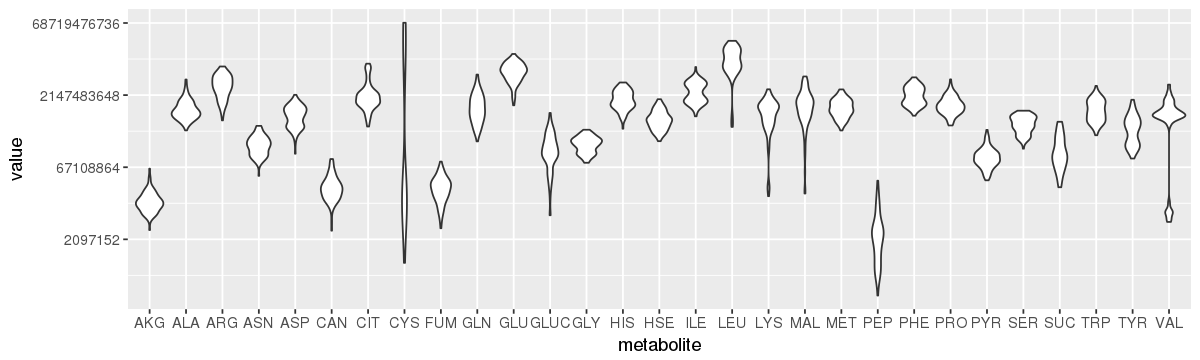

In [15]:
auc.data = melt(auc.phe.raw, varnames = c("metabolite", "strain"))
p6 <- ggplot(auc.data, aes(metabolite, value)) + geom_violin() + 
    scale_y_continuous(trans="log2")
p6

## Figure 7: Traits are highly correlated

In [17]:
all.data = merge(dplyr::rename(var.data, variance = value),
                 dplyr::rename(ss.data, sum.of.slopes = value),
                 by=c("metabolite","strain"))
all.data = merge(all.data,
                 dplyr::rename(auc.data, auc = value),
                 by=c("metabolite","strain"))
all.data.log2 = mutate(all.data, variance = log2(variance),
                      sum.of.slopes = log2(sum.of.slopes),
                      auc = log2(auc))

Warning message:
: Removed 224 rows containing non-finite values (stat_density).Warning message:
In (function (data, mapping, alignPercent = 0.6, method = "pearson", : Removed 218 rows containing missing valuesWarning message:
: Removed 1 rows containing missing values (geom_text).Warning message:
In (function (data, mapping, alignPercent = 0.6, method = "pearson", : Removed 218 rows containing missing valuesWarning message:
: Removed 1 rows containing missing values (geom_text).Warning message:
: Removed 218 rows containing missing values (geom_point).Warning message:
: Removed 224 rows containing non-finite values (stat_density).Warning message:
In (function (data, mapping, alignPercent = 0.6, method = "pearson", : Removed 218 rows containing missing valuesWarning message:
: Removed 1 rows containing missing values (geom_text).Warning message:
: Removed 218 rows containing missing values (geom_point).Warning message:
: Removed 218 rows containing missing values (geom_point).Warning m

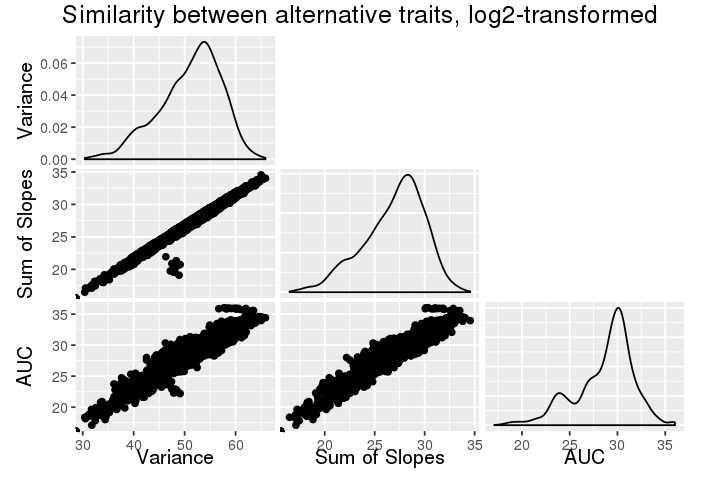

In [32]:
options(repr.plot.width = 6, repr.plot.height = 4)

ggpairs_logarithmize <- function(a) { # parameter a is a ggpairs sp-matrix
        max_limit <- sqrt(length(a$plots))
        for(j in 1:max_limit) { # index 1 is used to go through the diagonal also
                for(i in j:max_limit) {
                        subsp <- getPlot(a,i,j)
                        subspnew <- subsp + scale_y_log10() + scale_x_log10()
                        subspnew$type <- 'logcontinous'
                        subspnew$subType <- 'logpoints'
                        a <- putPlot(a,subspnew,i,j)
                }
        }
        return(a)
}
p7 <- ggpairs(all.data.log2 %>% filter(metabolite %in% unique(all.data$metabolite)),
             columns = c("variance", "sum.of.slopes", "auc"), 
              columnLabels = c("Variance", "Sum of Slopes", "AUC"),
             title = "Similarity between alternative traits, log2-transformed")
#p7 <- ggpairs_logarithmize(p7)
p7

## Figure 8: Traits are highly correlated, seprated by metabolite

I have to do this in batches, otherwise it's illegible. Metabolites selected in alphabetical order.

Warning message:
: Removed 51 rows containing non-finite values (stat_density).Warning message:
In (function (data, mapping, alignPercent = 0.6, method = "pearson", : Removed 51 rows containing missing valuesWarning message:
In (function (data, mapping, alignPercent = 0.6, method = "pearson", : Removed 51 rows containing missing valuesWarning message:
: Removed 51 rows containing missing values (geom_point).Warning message:
: Removed 51 rows containing non-finite values (stat_density).Warning message:
In (function (data, mapping, alignPercent = 0.6, method = "pearson", : Removed 51 rows containing missing valuesWarning message:
: Removed 51 rows containing missing values (geom_point).Warning message:
: Removed 51 rows containing missing values (geom_point).Warning message:
: Removed 51 rows containing non-finite values (stat_density).Warning message:
: Removed 58 rows containing non-finite values (stat_density).Warning message:
In (function (data, mapping, alignPercent = 0.6, method = 

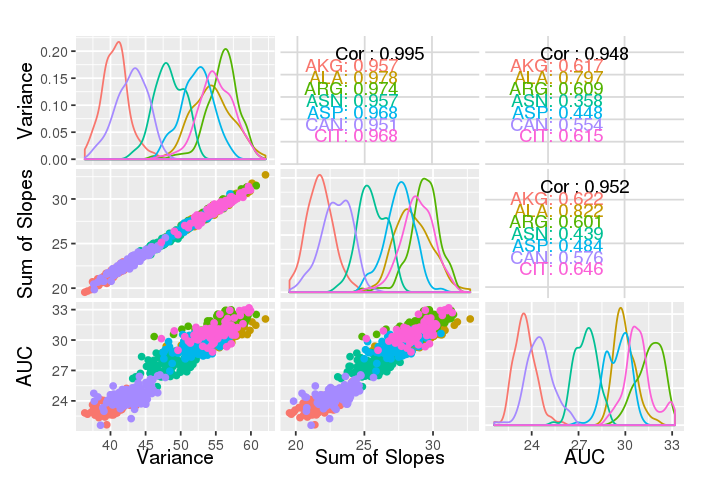

Warning message:
: Removed 69 rows containing non-finite values (stat_density).Warning message:
In (function (data, mapping, alignPercent = 0.6, method = "pearson", : Removed 69 rows containing missing valuesWarning message:
In (function (data, mapping, alignPercent = 0.6, method = "pearson", : Removed 69 rows containing missing valuesWarning message:
: Removed 69 rows containing missing values (geom_point).Warning message:
: Removed 69 rows containing non-finite values (stat_density).Warning message:
In (function (data, mapping, alignPercent = 0.6, method = "pearson", : Removed 69 rows containing missing valuesWarning message:
: Removed 69 rows containing missing values (geom_point).Warning message:
: Removed 69 rows containing missing values (geom_point).Warning message:
: Removed 69 rows containing non-finite values (stat_density).

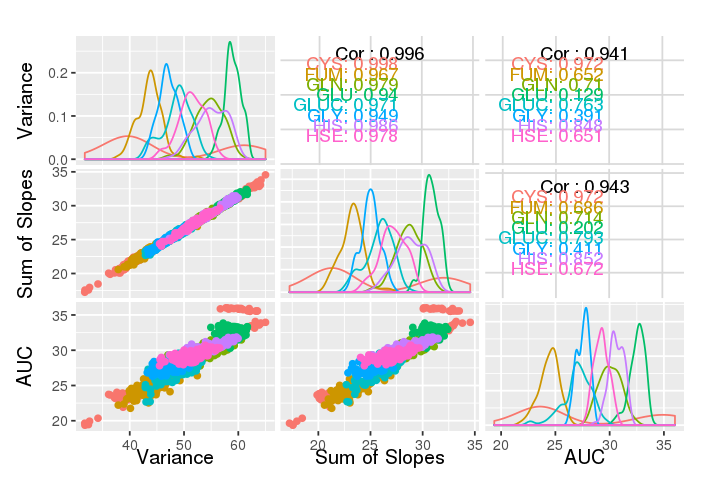

Warning message:
: Removed 46 rows containing non-finite values (stat_density).Warning message:
In (function (data, mapping, alignPercent = 0.6, method = "pearson", : Removed 40 rows containing missing valuesWarning message:
: Removed 1 rows containing missing values (geom_text).Warning message:
: Removed 6 rows containing missing values (geom_text).Warning message:
In (function (data, mapping, alignPercent = 0.6, method = "pearson", : Removed 40 rows containing missing valuesWarning message:
: Removed 1 rows containing missing values (geom_text).Warning message:
: Removed 6 rows containing missing values (geom_text).Warning message:
: Removed 40 rows containing missing values (geom_point).Warning message:
: Removed 46 rows containing non-finite values (stat_density).Warning message:
In (function (data, mapping, alignPercent = 0.6, method = "pearson", : Removed 40 rows containing missing valuesWarning message:
: Removed 1 rows containing missing values (geom_text).Warning message:
: Re

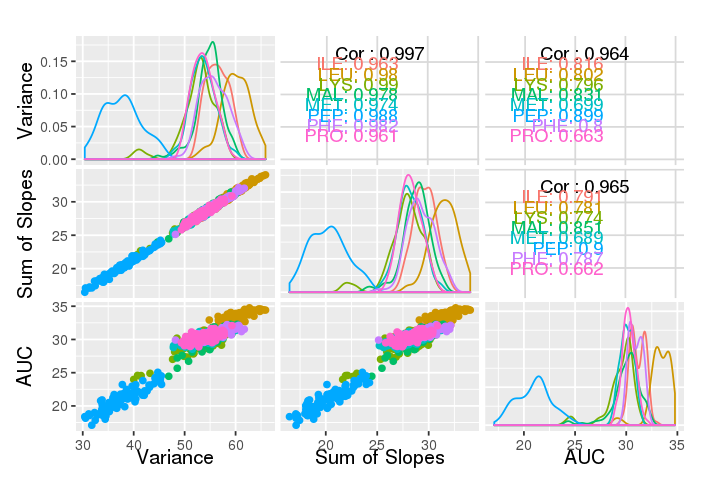

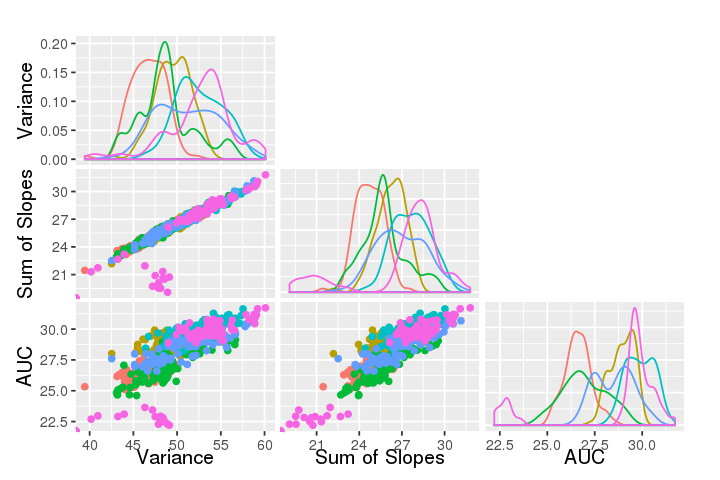

In [19]:
p8 <- ggpairs(all.data.log2 %>% filter(metabolite %in% unique(all.data$metabolite)[1:7]), 
                                  mapping = aes(color = metabolite),
             columns = c("variance", "sum.of.slopes", "auc"), 
              columnLabels = c("Variance", "Sum of Slopes", "AUC"))
p9 <- ggpairs(all.data.log2 %>% filter(metabolite %in% unique(all.data$metabolite)[8:15]), 
                                  mapping = aes(color = metabolite),
             columns = c("variance", "sum.of.slopes", "auc"), 
              columnLabels = c("Variance", "Sum of Slopes", "AUC"))
p10 <- ggpairs(all.data.log2 %>% filter(metabolite %in% unique(all.data$metabolite)[16:23]), 
                                  mapping = aes(color = metabolite),
             columns = c("variance", "sum.of.slopes", "auc"), 
              columnLabels = c("Variance", "Sum of Slopes", "AUC"))
p11 <- ggpairs(all.data.log2 %>% filter(metabolite %in% unique(all.data$metabolite)[24:29]), 
                                  mapping = aes(color = metabolite),
             columns = c("variance", "sum.of.slopes", "auc"), 
              columnLabels = c("Variance", "Sum of Slopes", "AUC"))

p8
p9
p10
p11

In [33]:
head(all.data)

,metabolite,strain,variance,sum.of.slopes,auc
1,AKG,01B,1.580605e+12,4354416,15928797
2,AKG,01C,348354500000,1298428,5335254
3,AKG,01D,1.354365e+12,3121158,9336240
4,AKG,02C,1.173935e+12,4194656,13685708
5,AKG,02D,6.34648e+11,1881076,5560605
6,AKG,03A,856619500000,2149297,6513234


In [34]:
head(all.data.log2)

,metabolite,strain,variance,sum.of.slopes,auc
1,AKG,01B,40.52361,22.05405,23.92513
2,AKG,01C,38.34177,20.30833,22.34713
3,AKG,01D,40.30075,21.57365,23.15441
4,AKG,02C,40.09449,22.00012,23.70617
5,AKG,02D,39.20717,20.84313,22.40681
6,AKG,03A,39.63986,21.03543,22.63494


# Conclusions:

- Few QTLs can be detected with these alternative traits. Similar observation to previous analysis by Aaron for varianceQTLs

- Of the few (two independent) QTLs that are detected, one is on chr13--putative BUL2 QTL that dominates metabolite levels

- Importantly, these traits are highly correlated, which explains why we do not see alternative QTLs